##🔄 **Extraccion de Datos de API**

In [ ]:
import pandas as pd
import requests

# URL de la API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Hacer la solicitud para obtener los datos
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()  # Convertir la respuesta a JSON
    df = pd.DataFrame(data)  # Convertir JSON en DataFrame
    print(df.head())  # Ver primeras filas
else:
    print(f"Error al obtener los datos: {response.status_code}")


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

##🔧 **Transformacion de datos(T-Transform)**

Explorando estructura

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


Mostrando los primeros registros

In [ ]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Expandiendo cada sección del json

In [ ]:
df_customer = pd.json_normalize(df["customer"])
df_phone = pd.json_normalize(df["phone"])
df_internet = pd.json_normalize(df["internet"])
df_account = pd.json_normalize(df["account"])

# Uniendo todas las columnas expandidas con el DataFrame original
df_clean = pd.concat([df[["customerID", "Churn"]], df_customer, df_phone, df_internet, df_account], axis=1)

# Ver primeras filas del nuevo DataFrame transformado
df_clean.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Tipos de datos de cada columna

In [ ]:
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


 Ver datos generales (valores nulos, tipos de datos)

In [ ]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Ver estadisticas básicas

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


Convertir Charges.Total a número

In [ ]:
df_clean["Charges.Total"] = pd.to_numeric(df_clean["Charges.Total"], errors="coerce")
print(df_clean.dtypes)  # Verificar que Charges.Total ahora sea float64

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


 Verificar valores únicos en columnas categórica

In [ ]:
print(df_clean["Churn"].unique())
print(df_clean["Contract"].unique())
print(df_clean["PaymentMethod"].unique())

['No' 'Yes' '']
['One year' 'Month-to-month' 'Two year']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Conteo de valores únicos

In [ ]:
print(df_clean["Churn"].value_counts())

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


Mostrar registros con valores vacios

In [ ]:
df_clean[df_clean["Churn"] == ""]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Reemplazando los valores vacios por Unknown

In [ ]:
df_clean["Churn"].replace("", "Unknown", inplace=True)

# Confirmar que la corrección se aplicó
print(df_clean["Churn"].value_counts())
print(df_clean.info())

Churn
No         5174
Yes        1869
Unknown     224
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  Streaming

<ipython-input-12-6f74d8551e57>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Churn"].replace("", "Unknown", inplace=True)


Transformación de Churn a valores binarios

In [ ]:
df_clean["Churn"] = df_clean["Churn"].map({"No": 0, "Yes": 1, "Unknown": -1})  # Reemplazo de valores
print(df_clean["Churn"].value_counts())  # Confirmar la transformación
print(df_clean.info())  # Ver estructura final

Churn
 0    5174
 1    1869
-1     224
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 n

Cuenta valores nulos

In [ ]:
print(df_clean["Charges.Total"].isna().sum())

11


Reemplazando datos vacios

In [ ]:
df_clean["Charges.Total"] = df_clean["Charges.Total"].infer_objects(copy=False).fillna(0)

In [ ]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##📈 **Carga y análisis(L - Load & Analysis)**

Estadísticas descriptivas del DataFrame

In [ ]:
df_clean.describe()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.226366,0.162653,32.346498,64.720098,2277.182035
std,0.486627,0.369074,24.571773,30.129572,2268.648587
min,-1.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,9.000000,35.425000,396.200000
50%,0.000000,0.000000,29.000000,70.300000,1389.200000
75%,1.000000,0.000000,55.000000,89.875000,3778.525000
max,1.000000,1.000000,72.000000,118.750000,8684.800000


Distribución de Evasión (Churn)

<ipython-input-18-0a1cdee26f8c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_order, x="Churn", y="Cantidad", palette=["#F4E0AF", "#A8CD89", "#F9C0AB"])


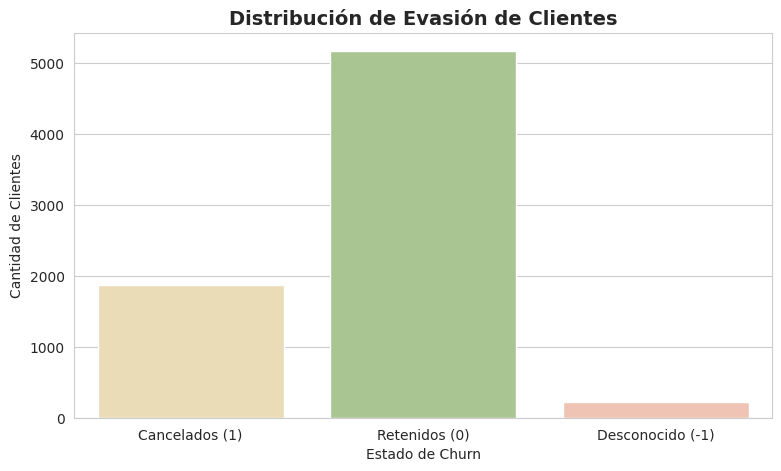

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(9,5))

# Definir el orden manualmente en un nuevo DataFrame
churn_order = pd.DataFrame({
    "Churn": ["Cancelados (1)", "Retenidos (0)", "Desconocido (-1)"],
    "Cantidad": [
        df_clean["Churn"].value_counts().get(1, 0),
        df_clean["Churn"].value_counts().get(0, 0),
        df_clean["Churn"].value_counts().get(-1, 0)
    ]
})

# Crear el gráfico con el orden correcto
sns.barplot(data=churn_order, x="Churn", y="Cantidad", palette=["#F4E0AF", "#A8CD89", "#F9C0AB"])

# Etiquetas y título
plt.title("Distribución de Evasión de Clientes", fontsize=14, fontweight="bold")
plt.xlabel("Estado de Churn")
plt.ylabel("Cantidad de Clientes")
plt.show()

Tabla de distribución de Evasión por Variables Categóricas

In [ ]:
import pandas as pd

# Variables categóricas clave
categorical_vars = ["gender", "Contract", "PaymentMethod"]

# Crear un DataFrame con las proporciones de Churn por cada variable categórica
summary_tables = {}
for var in categorical_vars:
    summary_tables[var] = df_clean.groupby(var)["Churn"].value_counts(normalize=True).unstack().round(3) * 100  # Convertir a porcentaje

# Mostrar la tabla de cada variable categórica
for var, table in summary_tables.items():
    print(f"\n🔹 Distribución de Churn por {var}:")
    display(table)  # Esto funciona en Jupyter Notebook y Google Colab


🔹 Distribución de Churn por gender:


Churn,-1,0,1
gender,,,
Female,2.9,71.0,26.1
Male,3.3,71.4,25.3



🔹 Distribución de Churn por Contract:


Churn,-1,0,1
Contract,,,
Month-to-month,3.2,55.4,41.3
One year,3.0,86.0,10.9
Two year,2.8,94.5,2.8



🔹 Distribución de Churn por PaymentMethod:


Churn,-1,0,1
PaymentMethod,,,
Bank transfer (automatic),2.8,80.9,16.2
Credit card (automatic),2.9,82.3,14.8
Electronic check,3.3,52.9,43.8
Mailed check,3.2,78.3,18.5


Estadísticas descriptivas por grupo de Churn

In [ ]:
df_clean.groupby("Churn")[["tenure", "Charges.Total"]].describe()

tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
-1      224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0   
 0     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
 1     1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      Charges.Total                                                       \
              count         mean          std    min       25%       50%   
Churn                                                                      
-1            224.0  2196.933705  2329.961954  18.90  351.0375  1163.175   
 0           5174.0  2549.911442  2329.954215   0.00  572.9000  1679.525   
 1           1869.0  1531.796094  1890.822994  18.85  134.5000   703.550   

                           
             75%      max  
Churn                      
-1     3562.8625  8425.30  
 0     4262.8500  8672.45  
 1     2331.3000  8684.80

In [ ]:
import pandas as pd

# Seleccionar las variables numéricas clave
numerical_vars = ["tenure", "Charges.Total"]

# Obtener estadísticas descriptivas por grupo de Churn
churn_summary = df_clean.groupby("Churn")[numerical_vars].describe().T

# Mostrar la tabla de manera clara
display(churn_summary)

Churn                         -1            0            1
tenure        count   224.000000  5174.000000  1869.000000
              mean     31.571429    37.569965    17.979133
              std      24.998552    24.113777    19.531123
              min       1.000000     0.000000     1.000000
              25%       7.000000    15.000000     2.000000
              50%      29.000000    38.000000    10.000000
              75%      56.000000    61.000000    29.000000
              max      72.000000    72.000000    72.000000
Charges.Total count   224.000000  5174.000000  1869.000000
              mean   2196.933705  2549.911442  1531.796094
              std    2329.961954  2329.954215  1890.822994
              min      18.900000     0.000000    18.850000
              25%     351.037500   572.900000   134.500000
              50%    1163.175000  1679.525000   703.550000
              75%    3562.862500  4262.850000  2331.300000
              max    8425.300000  8672.450000  8684.800000

Relación entre Tenure y Cancelación(Churn)

<ipython-input-30-dda25cb08669>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Churn", y="tenure", palette=["red", "gray", "green"], order=order)


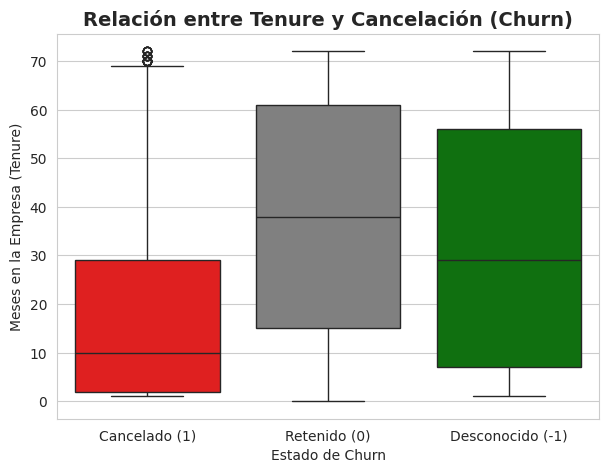

In [ ]:
plt.figure(figsize=(7,5))

# Definir el orden correcto de las categorías y sus etiquetas con números
order = [1, 0, -1]
labels = ["Cancelado (1)", "Retenido (0)", "Desconocido (-1)"]

sns.boxplot(data=df_clean, x="Churn", y="tenure", palette=["red", "gray", "green"], order=order)
plt.xticks(ticks=[0, 1, 2], labels=labels)

plt.title("Relación entre Tenure y Cancelación (Churn)", fontsize=14, fontweight="bold")
plt.xlabel("Estado de Churn")
plt.ylabel("Meses en la Empresa (Tenure)")
plt.show()

Estadísticas descriptivas de Charges.Total por Churn

In [ ]:
df_clean.groupby("Churn")["Charges.Total"].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
-1,224.0,2196.933705,2329.961954,18.90,351.0375,1163.175,3562.8625,8425.30
0,5174.0,2549.911442,2329.954215,0.00,572.9000,1679.525,4262.8500,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.5000,703.550,2331.3000,8684.80


<ipython-input-29-4f581b7113e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Churn", y="Charges.Total", palette=["red", "gray", "green"], order=order)


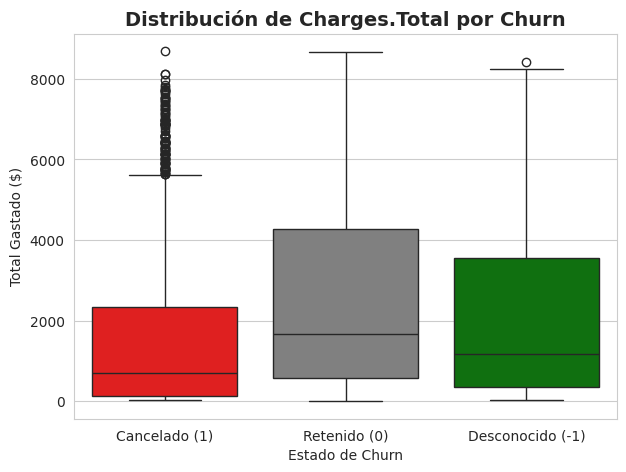

In [ ]:
plt.figure(figsize=(7,5))

# Definir el orden correcto de las categorías y sus etiquetas con números
order = [1, 0, -1]
labels = ["Cancelado (1)", "Retenido (0)", "Desconocido (-1)"]

sns.boxplot(data=df_clean, x="Churn", y="Charges.Total", palette=["red", "gray", "green"], order=order)
plt.xticks(ticks=[0, 1, 2], labels=labels)

plt.title("Distribución de Charges.Total por Churn", fontsize=14, fontweight="bold")
plt.xlabel("Estado de Churn")
plt.ylabel("Total Gastado ($)")
plt.show()

## **📝Informe Final del Challenge**

🔹 Introducción

📌 Objetivo del análisis:
El propósito de este análisis es entender los factores que influyen en la cancelación de clientes (Churn) en el negocio. A través de la exploración de variables como tenure, Charges.Total, Contract y PaymentMethod, buscamos identificar patrones clave que expliquen por qué algunos clientes abandonan el servicio, mientras otros permanecen.

📌 Problema de evasión de clientes (Churn)
La cancelación de clientes puede afectar la rentabilidad de la empresa. Si identificamos qué factores están relacionados con la evasión, podemos implementar estrategias para aumentar la retención y reducir la pérdida de clientes.

🔹 Limpieza y Tratamiento de Datos


📌 Pasos realizados:
* Importación de datos → Cargamos el dataset en un DataFrame limpio.
* Revisión de valores nulos → Verificamos si había valores faltantes y cómo manejarlos.
* Conversión de tipos de datos → Aseguramos que Churn, tenure, Charges.Total, y otras columnas tuvieran los formatos correctos.
* Corrección de categorías → Ajustamos valores para representar correctamente los estados de Churn (0 = Retenido, 1 = Cancelado, -1 = Desconocido).


Código de limpieza ejecutado:


In [ ]:
# Verificación de valores nulos
df_clean.isnull().sum()

# Conversión de tipo de datos
df_clean["tenure"] = df_clean["tenure"].astype(int)
df_clean["Churn"] = df_clean["Churn"].astype(int)

# Renombrar valores de Churn para mejor interpretación
df_clean["Churn"] = df_clean["Churn"].replace({0: "Retenido", 1: "Cancelado", -1: "Desconocido"})

📌 Conclusión:  
Después de limpiar los datos, aseguramos que todas las variables estuvieran en el formato correcto para el análisis.

🔹 Análisis Exploratorio de Datos  
📌 Objetivo: Analizar patrones en las características de los clientes para identificar diferencias entre retenidos y cancelados.  
🔹 1. Estadísticas Descriptivas  
Ejecutamos estadísticas descriptivas sobre tenure y Charges.Total para evaluar diferencias en tiempo de permanencia y gasto total entre clientes.

Código ejecutado:

In [ ]:
df_clean.groupby("Churn")[["tenure", "Charges.Total"]].describe()

📊 Hallazgos principales:  
* Clientes cancelados (Churn = 1) tienen menor tenure (~18 meses en promedio).
* Clientes retenidos (Churn = 0) tienen mayor permanencia (~38 meses en promedio).  
* Clientes que gastan menos (Charges.Total bajo) tienden a cancelar más rápido.  
🔹 2. Análisis de Distribución de Churn
Generamos histogramas y boxplots para visualizar tenure y Charges.Total según Churn.


Código ejecutado:

In [ ]:
sns.histplot(data=df_clean, x="tenure", hue="Churn", bins=30, kde=True, palette=["gray", "red", "green"])
plt.title("Distribución de Tenure según Churn")
plt.xlabel("Meses en la Empresa (Tenure)")
plt.ylabel("Cantidad de Clientes")
plt.show()

📊 Conclusión:  
Los clientes nuevos tienden a cancelar más rápido, mientras que los de largo plazo permanecen en el servicio.  
🔹 3. Evasión por Variables Categóricas  
Analizamos Contract y PaymentMethod para ver si afectan la cancelación.


Código ejecutado:

In [ ]:
df_clean.groupby("Churn")["Contract"].value_counts()
df_clean.groupby("Churn")["PaymentMethod"].value_counts()

📊 Hallazgos:  
* Los clientes con contrato "Month-to-Month" cancelan más que los de contrato anual.  
* Los pagos por "Electronic Check" están más asociados con cancelaciones.  
🔹 4. Evasión por Variables Numéricas (tenure y Charges.Total)
Generamos boxplots para comparar tenure y Charges.Total entre clientes retenidos y cancelados.


Código ejecutado - Boxplot de Tenure:

In [ ]:
plt.figure(figsize=(7,5))
order = [1, 0, -1]
labels = ["Cancelado (1)", "Retenido (0)", "Desconocido (-1)"]
sns.boxplot(data=df_clean, x="Churn", y="tenure", palette=["red", "gray", "green"], order=order)
plt.xticks(ticks=[0, 1, 2], labels=labels)
plt.title("Relación entre Tenure y Cancelación (Churn)")
plt.xlabel("Estado de Churn")
plt.ylabel("Meses en la Empresa (Tenure)")
plt.show()

📊 Conclusión:  
Los clientes cancelados tienen menor tenure, lo que sugiere que la retención inicial es clave.

___

🔹 Conclusiones e Insights  
📌 Resumen de hallazgos:  
* Los clientes nuevos (tenure bajo) cancelan más rápido.  
* Los clientes que gastan menos (Charges.Total bajo) tienen mayor tasa de cancelación.  
* Los contratos Month-to-Month tienen mayor evasión.  
* Los pagos con "Electronic Check" están asociados con más cancelaciones.  
📌 Interpretación de resultados:  
🔹 El compromiso financiero y el tiempo en la empresa influyen en la retención de clientes.  
🔹 Ofrecer incentivos para planes a largo plazo podría reducir cancelaciones.  
🔹 La estabilidad en el método de pago podría ser una variable clave para mejorar la retención.

---

🔹 Recomendaciones  
📌 1. Estrategias para retener clientes nuevos  
* Ofrecer descuentos para clientes en los primeros meses.  
* Implementar programas de fidelización con beneficios a largo plazo.  
* Mejorar soporte al cliente en los primeros 6 meses.  
📌 2. Incentivar contratos largos  
* Promover planes anuales con descuentos adicionales.  
* Destacar las ventajas de evitar contratos mensuales.  
📌 3. Evaluar métodos de pago  
* Analizar por qué los clientes con "Electronic Check" tienen más cancelaciones.  
* Incentivar pagos con tarjeta de crédito para mayor estabilidad.